<h1 style="text-align: center;"> P452 - Computational Physics</h1>
<h2 style="text-align: center;"> Assignment 2</h2>
<h3 style="text-align: center;"> Jyotirmaya Shivottam | 1711069</h3>

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from _1711069_assgn02_utils import mlcgList, gauss_seidel, gauss_elim

1. The data from an experiment is given in the file `assign2fit.txt`. Try a cubic least square fit using $y = f(x) = a_0 + a_1x + a_2x^2 + a_3x^3 $. Try fitting the data-set with a modified basis, $y = f(x) = a_0\phi_0(x) + a_1\phi_1(x) + a_2\phi_2(x) + a_3\phi_3(x)$, where, $\phi_0(x) = 1$, $\phi_1(x) = 2x - 1$, $\phi_2(x) = 8x^2 - 8x + 1$, $\phi_3(x) = 32x^3 - 48x^2 + 18x - 1$. Here, $\phi_\alpha$ are modified Chebyshev functions. Can you explain the difference by comparing the relative merit of different functions by calculating the condition number? (You may use online condition number or norm calculator.)

In [4]:
# Loading data
data = np.genfromtxt("assign2fit.txt")
x, y = data[:, 0], data[:, 1]
x, y

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 array([0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124,
        1.095, 1.122, 1.102, 1.099, 1.017, 1.111, 1.117, 1.152, 1.265,
        1.38 , 1.575, 1.857]))

In [5]:
# Sigma values for y - perhaps as least count
yerr = np.tile([0.001], x.shape[0])
yerr

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001])

In [11]:
def poly(n, x):
    return x ** n

def cheby(n, x):
    chebyshev = {
        0: 1,
        1: x,
        2: 2 * x ** 2 - 1,
        3: 4 * x ** 3 - 3 * x,
    }

    return chebyshev[n]

def polyfit(x, y, yerr, n=2, basis="poly"):
    """
    Polynomial Least-Squares Fitting

    """
    bases = {
        "poly": poly,
        "cheby": cheby
    }

    basis = bases[basis]

    N = n + 1
    A = np.empty((N, N))
    b = np.empty(N)

    for i in range(N):
        for j in range(N):
            A[i, j] = np.sum(basis(i, x) * basis(j, x) / yerr ** 2)
            b[j] = np.sum((basis(j, x) * y) / yerr ** 2)

    # Using Gauss-Elimination to calculate x
    return gauss_elim(A, b)

In [12]:
# Cubic LSq fit
_, (a0, a1, a2, a3), _ = polyfit(x, y, yerr, n=3)
polytuple = (a0, a1, a2, a3)
polytuple

(0.5746586674194756,
 4.7258614421437075,
 -11.128217777647695,
 7.668677622912345)

In [13]:
# Cheby LSq fit
_, (a0, a1, a2, a3), _ = polyfit(x, y, yerr, n=3, basis="cheby")
chebytuple = (a0, a1, a2, a3)
chebytuple

(-4.9894502214032475,
 10.477369659326074,
 -5.564108888822789,
 1.917169405727739)

In [14]:
def func(x, a0, a1, a2, a3, basis="poly"):
    if basis == "cheby":
        ch = cheby
        return a0 * ch(0, x) + a1 * ch(1, x) + a2 * ch(2, x) + a3 * ch(3, x)

    return a0 + a1 * x + a2 * x ** 2 + a3 * x ** 3

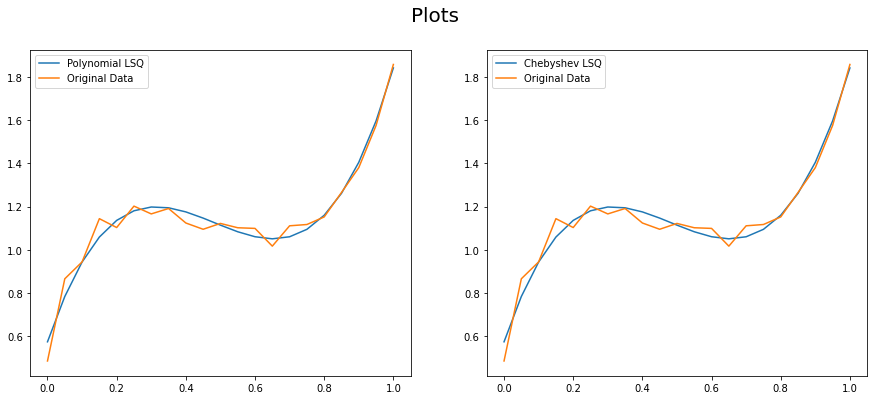

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func(x, *polytuple), label="Polynomial LSQ")
axs[0].plot(x, y, label="Original Data")
axs[1].plot(x, func(x, *chebytuple, basis="cheby"), label="Chebyshev LSQ")
axs[1].plot(x, y, label="Original Data")

axs[0].legend()
axs[1].legend()
plt.show()

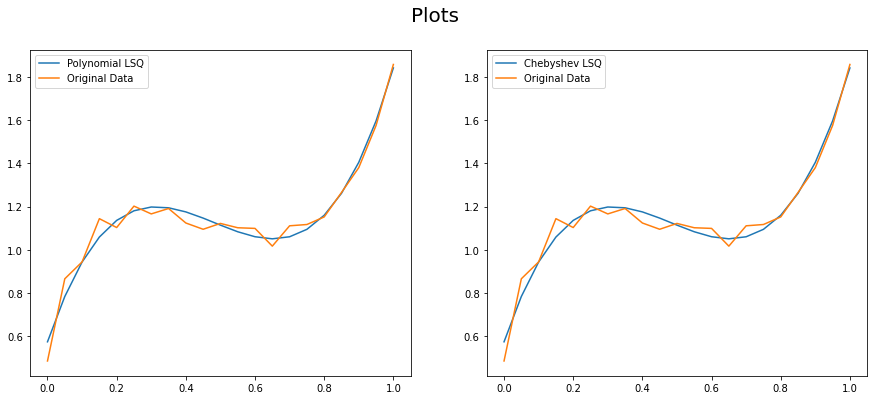

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
fig.suptitle("Plots", fontsize=20)
axs[0].plot(x, func(x, *polytuple), label="Polynomial LSQ")
axs[0].plot(x, y, label="Original Data")
axs[1].plot(x, func(x, *chebytuple, basis="cheby"), label="Chebyshev LSQ")
axs[1].plot(x, y, label="Original Data")

axs[0].legend()
axs[1].legend()
plt.show()

2. Generate your own random numbers in appropriate range using *multiplicative linear congruential generator* defined by $x_n = (a x_{n - 1})\mod m$ using: ($i$) $a = 65, m = 1021$ and ($ii$) $a = 572, m = 16381$. Determine the value of $\pi$, both by (a) throwing points and (b) by solving the integral given below by Monte Carlo:
$$\frac{\pi}{4} = \int_0^1\mathrm{dx}\sqrt{1 - x^2}$$
Comment on the choice of a, m based on your value of π. Use your own seed.

In [9]:
# These store random numbers between -1 and 1 | Seed = 42
dist1 = mlcgList(int(1e6), (0, 2), a=65, m=1021.) - 1.
dist2 = mlcgList(int(1e6), (0, 2), a=572, m=16381.) - 1.

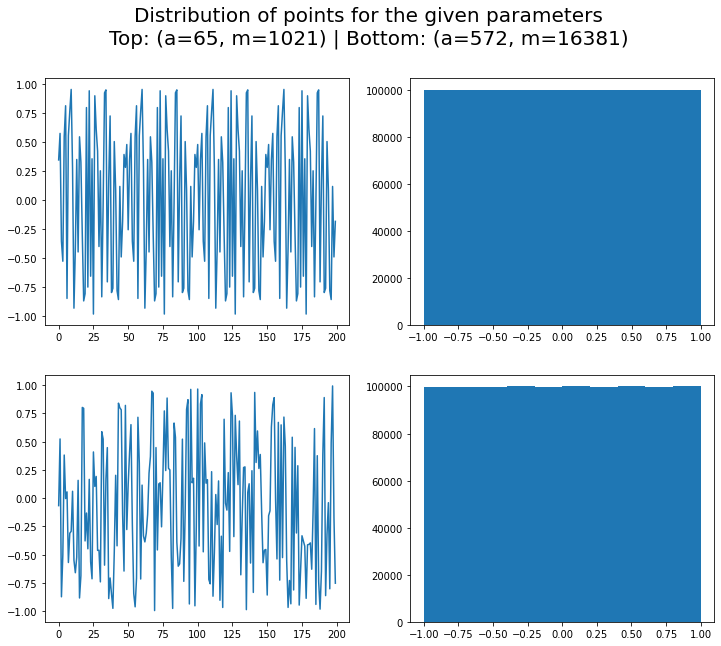

In [10]:
# Skipping some values to better showcase the periodicity for these parameter sets
# Note that, the histogram implies a uniform distribution
skip = 5000

fig, axs = plt.subplots(2, 2, figsize=(12,10))
fig.suptitle("Distribution of points for the given parameters\nTop: (a=65, m=1021) | Bottom: (a=572, m=16381)", fontsize=20)
axs[0, 0].plot(dist1[::skip],)
axs[0, 1].hist(dist1,)
axs[1, 0].plot(dist2[::skip],)
axs[1, 1].hist(dist2,)

plt.show()

Obtaining π by throwing points:

In [11]:
N = int(1e6)

circ = 0
out = 0

# Sampling x & y using own MLCG as invoked above
x = mlcgList(N, (0, 2), a=572, m=16381., seed=42) - 1.
y = mlcgList(N, (0, 2), a=572, m=16381., seed=52) - 1.

for i in range(N):
    cond = x[i] ** 2 + y[i] ** 2 <= 1.

    if cond:
        circ += 1

    out += 1

π = 4 * circ / out
print(f"Value for π, obtained by throwing points for Set 1: {π}")

Value for π, obtained by throwing points for Set 1: 3.149164


In [12]:
N = int(1e6)

circ = 0
out = 0

# Sampling x & y using own MLCG as invoked above
x = mlcgList(N, (0, 2), a=65, m=1021., seed=42) - 1.
y = mlcgList(N, (0, 2), a=65, m=1021., seed=52) - 1.

for i in range(N):
    cond = x[i] ** 2 + y[i] ** 2 <= 1.

    if cond:
        circ += 1

    out += 1

π = 4 * circ / out
print(f"Value for π, obtained by throwing points for Set 2: {π}")

Value for π, obtained by throwing points for Set 2: 3.168644


In [13]:
N = int(1e6)

circ = 0
out = 0

# Sampling x & y using own MLCG as invoked above
x = dist1
y = dist2

for i in range(N):
    cond = x[i] ** 2 + y[i] ** 2 <= 1.

    if cond:
        circ += 1

    out += 1

π = 4 * circ / out
print(f"Value for π, obtained by throwing points for mixed samples: {π}")

Value for π, obtained by throwing points for mixed samples: 3.147024


Clearly, the choice of $a$, $m$ affects the obtained value. In particular, set 1 with a lower period seems to lead to a closer value for π than set 2.

Obtaining π by integrating the given equation via MC:

In [14]:
def MCInt(f:callable, lims:tuple, N:int=int(1e5)):
    a, b = lims
    # Sampling points in the specified interval using own MLCG
    reg = mlcgList(N, (a, b), a=65, m=1021.)

    try:
        fvec = np.vectorize(f)
        intg = np.sum(fvec(reg))
    except:
        intg = 0
        for i in reg:
            intg += np.sum(f(i))

    intg *= ((b - a) / N)

    return intg

In [15]:
# Function, to be integrated
def f(x):
	return np.sqrt(1 - x ** 2)

integral = MCInt(f, (0, 1), N=int(1e6))
π = 4 * integral
print(f"Value for π, obtained by MC integration: {π}")

Value for π, obtained by MC integration: 3.142687330599827


3. Using the MLCG defined in problem 2 with the parameter set you think is best, determine by Monte Carlo method, the volume of *Steinmetz solid*, the intersection of two perpendicular cylinders each of radius 1 unit. 

In [16]:
N = int(1e6)

sol = 0
out = 0

# Sampling x, y & z using own MLCG | a = 1664525, m = 2**32
x = mlcgList(N, (0, 2), seed=42) - 1
y = mlcgList(N, (0, 2), seed=52) - 1
z = mlcgList(N, (0, 2), seed=62) - 1

for i in range(N):
    cond = x[i] ** 2 + y[i] ** 2 <= 1. and x[i] ** 2 + z[i] ** 2 <= 1.

    if cond:
        sol += 1

    # Counting the number of points falling within the intersecting cuboids
    out += 1

We know that the volume of a Steinmetz solid is $16 r^3 / 3$ (analytically), while that of a solid composed of two intersecting unit cubes would be $(2r)^3 = 8r^3$. So, the volume ratio is expected to be $2 / 3 \approx 0.6667$. And the volume should be $16 / 3$ or $8 \times (2 / 3) \equiv 8 \times ratio$.

In [20]:
print(f"Ratio of number of points within the volume to that outside (in the cuboids / cylinders): {sol / out}")

v_sol = 8 * (sol / out)
print(f"Volume of a unit Steinmetz solid, obtained via repeated sampling / MC: {v_sol}")

Ratio of number of points within the volume to that outside (in the cuboids / cylinders): 0.665421
Volume of a unit Steinmetz solid, obtained via repeated sampling / MC: 5.323368
